In [1]:
import matplotlib.pyplot as plt
import networkx as nx

### Problem 0

In [2]:
# CREATING A GRAPH

# Create graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

# Add nodes from another graph
H = nx.path_graph(10)
G.add_nodes_from(H)

# Add a graph as a node (graph of graphs)
G.add_node(H)

# Add edges
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple
G.add_edges_from([(1, 2), (1, 3)])

# Add edges from another graph
G.add_edges_from(H.edges)

# Clear the graph
G.clear()

# We can add duplicate edges (networkx won't complain) or add nodes that are strings instead of numbers
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [3]:
# EXAMING A GRAPH

# Look at the number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

# Look at the nodes, edges, adjacencies, and degrees
# These are like dictionaries, where we index with the node label instead of an index
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))
print(G.degree[1])

# We can look at the same information for subsets of nodes
print(list(G.edges([2, 'm'])))  # Edges for nodes 2 and m
print(list(G.degree([2, 3])))  # Degree for nodes 2 and 3


8
3
[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2
[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


In [4]:
# REMOVING ELEMENTS

# Remove nodes
G.remove_node(2)  # Remove a single node
G.remove_nodes_from("spam")  # Remove an iterable of nodes
print(list(G.nodes))

# Remove edges
G.remove_edge(1, 3)

print(list(G.edges))

[1, 3, 'spam']
[]


In [5]:
# GRAPH CONSTRUCTOR

# Instead of building graphs incrementally, we can use constructors

# Create a DiGraph using the connections from G
G.add_edge(1, 2)
H = nx.DiGraph(G)  
print(list(H.edges()))

# Create a graph from an edge list
edge_list = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edge_list)  
print(list(H.edges()))

# Create a Graph dict mapping nodes to neighbors
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]
[(0, 1), (0, 2), (1, 2)]


In [6]:
# ACCESSING EDGES AND NEIGHBORS

# Instead of directly calling Graph.edges or Graph.adj, we can use subscript notation
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])  # same as G.adj[1]
print(G[1][2])
print(G.edges[1, 2])

# We can set attributes on edges
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(G.edges[1, 2])

# We can quickly examine all (node, adjacency) pairs
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

# We can access all edges at one time
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}
{'color': 'red'}
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


In [7]:
# ADDING ATTRIBUTES TO GRAPHS

# Assign graph attributes when creating a new graph
G = nx.Graph(day="Friday")
print(G.graph)

# Can modify attributes after the graph has been created
G.graph['day'] = "Monday"
print(G.graph)

# Node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])
print(G.nodes[3])
G.nodes[1]['room'] = 714
print(G.nodes.data())

# Edge attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

{'day': 'Friday'}
{'day': 'Monday'}
{'time': '5pm'}
{'time': '2pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]
[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


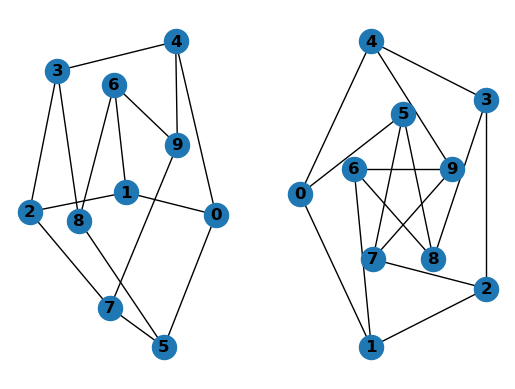

In [14]:
# DRAWING GRAPHS

# Test if import of nx_pylab was successful
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

### Problem 1

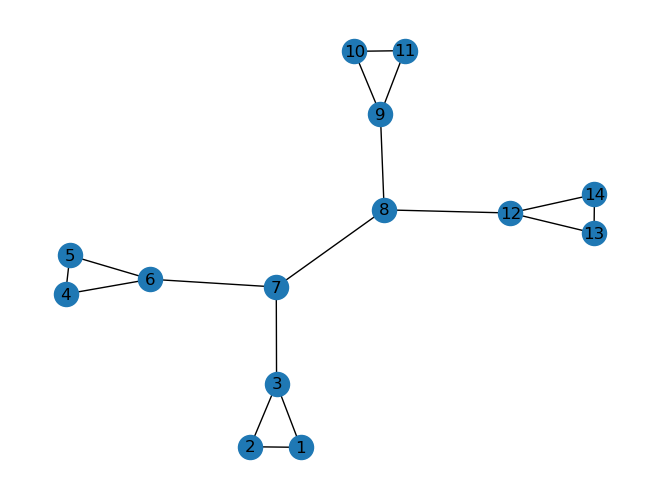

In [59]:
edge_list = [(1, 2), (1, 3), (2, 3), (3, 7), (4, 5), (4, 6), (5, 6), (6, 7), 
             (7, 8), (8, 9), (9, 10), (9, 11), (10, 11), (12, 13), (12, 14), 
             (13, 14), (12, 8)]
G = nx.Graph(edge_list)  
nx.draw(G, with_labels=True)

### Problem 2

In [92]:
# Note: I use assertion statements in each cell to ensure the number of nodes is either 10 or 20

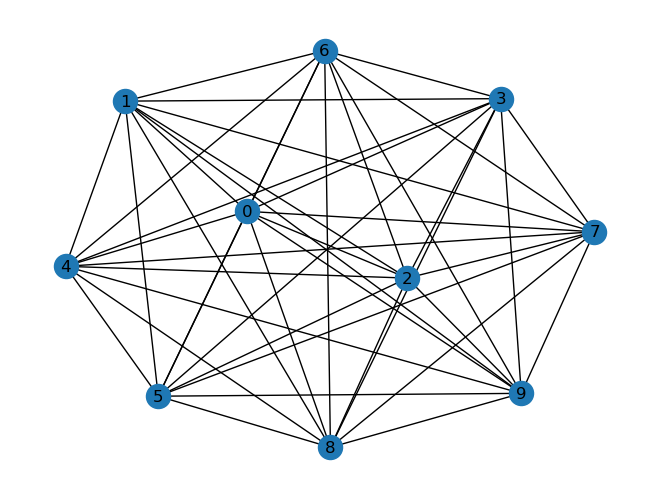

In [66]:
# Complete graph with 10 vertices
G = nx.complete_graph(10) 
assert G.number_of_nodes() == 10
nx.draw(G, with_labels=True)

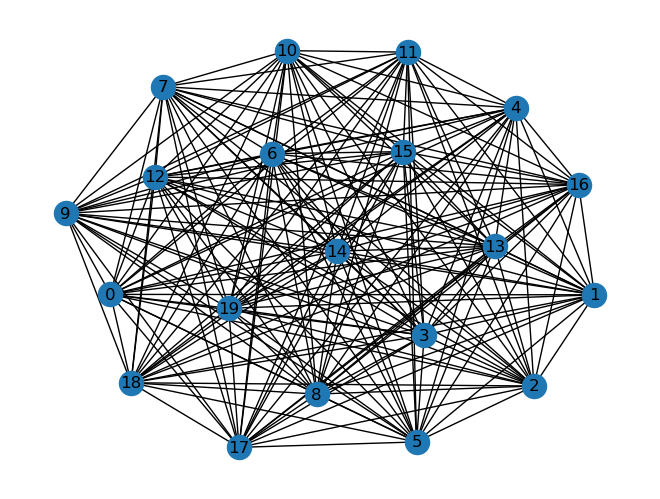

In [68]:
# Complete graph with 20 vertices
G = nx.complete_graph(20) 
assert G.number_of_nodes() == 20
nx.draw(G, with_labels=True)

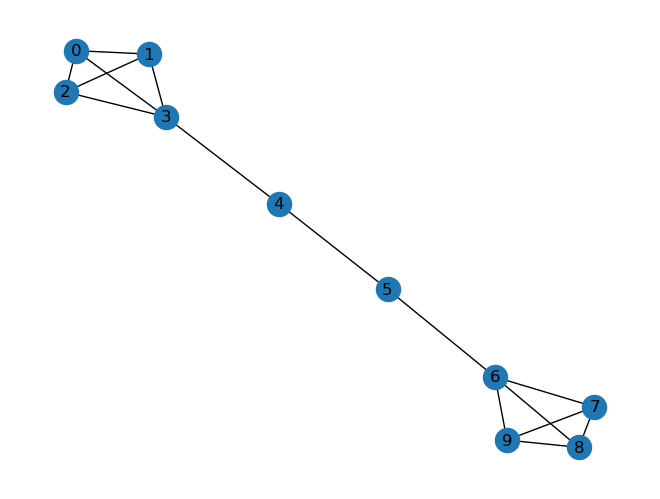

In [70]:
# Barbell graph with 10 vertices (4 in each barbell, 2 in the path connecting the barbells)
G = nx.barbell_graph(4, 2) 
assert G.number_of_nodes() == 10
nx.draw(G, with_labels=True)

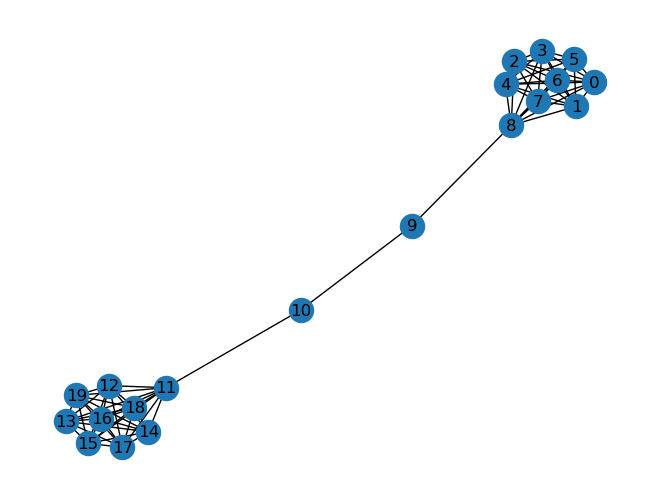

In [71]:
# Barbell graph with 20 vertices (9 in each barbell, 2 in the path connecting the barbells)
G = nx.barbell_graph(9, 2) 
assert G.number_of_nodes() == 20
nx.draw(G, with_labels=True)

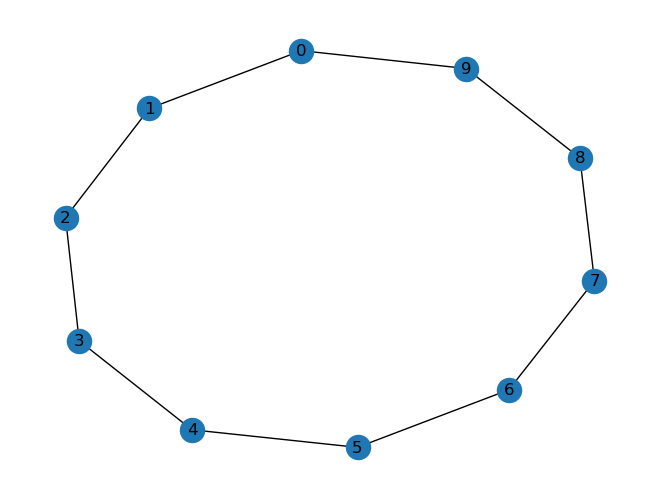

In [72]:
# Cycle graph with 10 vertices
G = nx.cycle_graph(10) 
assert G.number_of_nodes() == 10
nx.draw(G, with_labels=True)

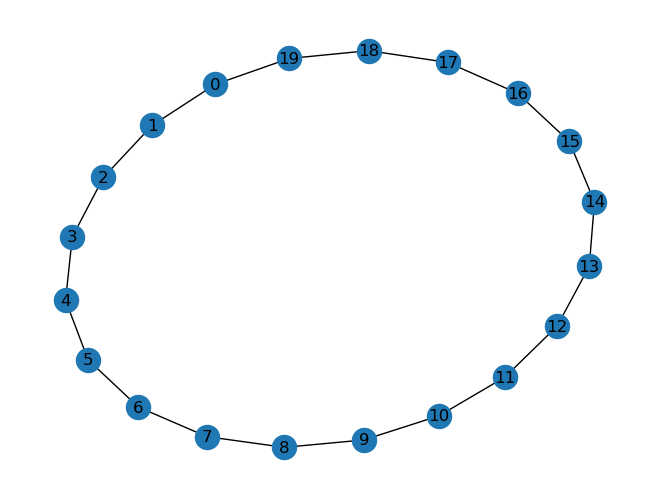

In [73]:
# Cycle graph with 20 vertices
G = nx.cycle_graph(20) 
assert G.number_of_nodes() == 20
nx.draw(G, with_labels=True)

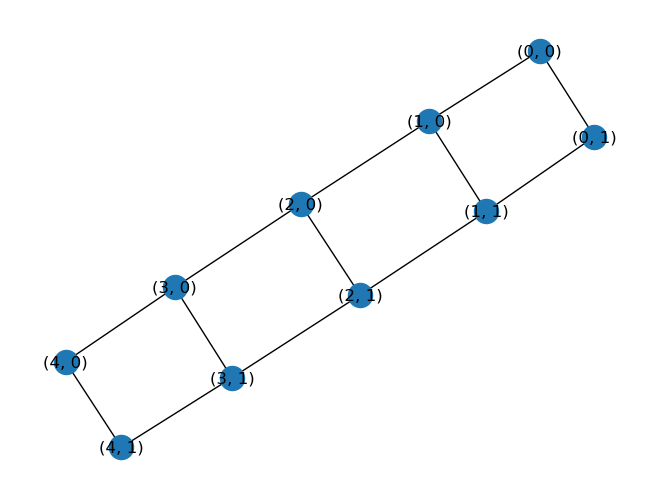

In [82]:
# Lattice graph with 10 vertices
G = nx.grid_2d_graph(5, 2) 
assert G.number_of_nodes() == 10
nx.draw(G, with_labels=True)

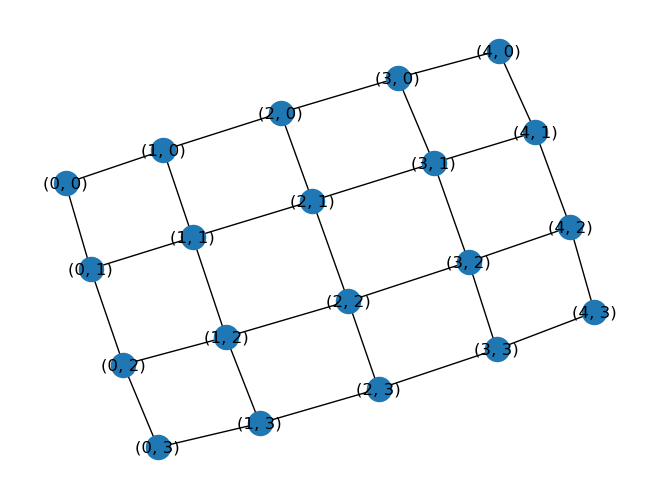

In [83]:
# Lattice graph with 20 vertices
G = nx.grid_2d_graph(5, 4) 
assert G.number_of_nodes() == 20
nx.draw(G, with_labels=True)

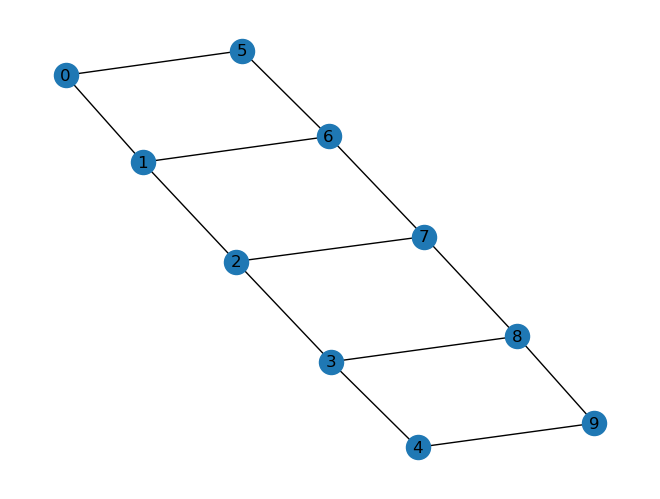

In [90]:
# Ladder graph with 10 vertices
G = nx.ladder_graph(5) 
assert G.number_of_nodes() == 10
nx.draw(G, with_labels=True)

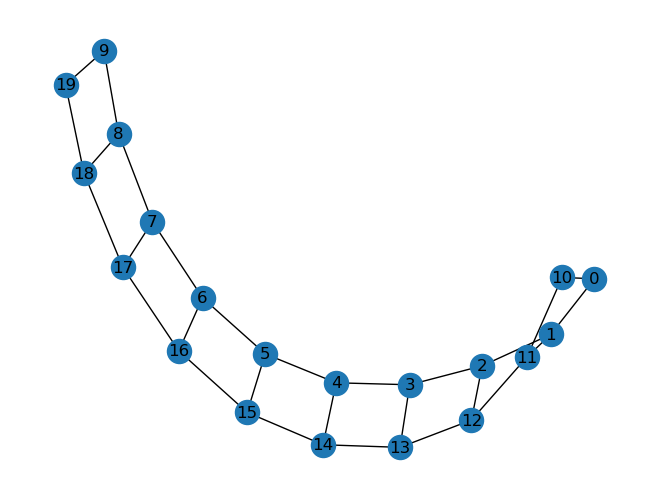

In [91]:
# Ladder graph with 20 vertices
G = nx.ladder_graph(10) 
assert G.number_of_nodes() == 20
nx.draw(G, with_labels=True)

### Problem 3